# Covariates - Milk Production

In this notebook, we'll analyze and try to model the behavior of the `Milk Production` variable, that'll be used as an explanatory variable to our final model.

In [2]:
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

from utils import get_filtered_data, create_future_dataframe, plot_series

In [3]:
#Reading the data
df = get_filtered_data()

## Visualizing the Data

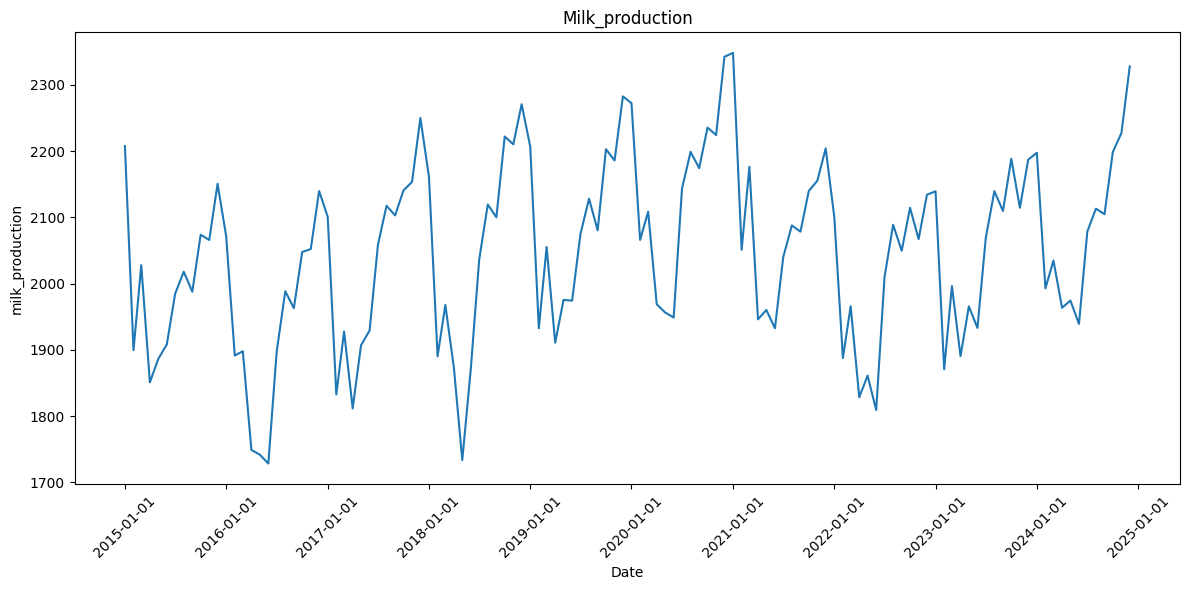

In [4]:
milk_production = df[['date', 'milk_production']] 
plot_series(milk_production, 'milk_production')

## Basic Linear Regression Model

In [5]:
milk_production = (
    milk_production
    .assign(
        t = range(len(milk_production)),
        month = milk_production["date"].dt.month
    )
)

# Fit linear regression with trend + seasonal dummies
model_milk_production = smf.ols("milk_production ~ t + C(month)", data=milk_production).fit()

In [6]:
model_milk_production.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        milk_production   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     31.84
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           7.05e-30
Time:                        15:33:08   Log-Likelihood:                -668.97
No. Observations:                 120   AIC:                             1364.
Df Residuals:                     107   BIC:                             1400.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2134.3292     23.451     91.010      0.000    2087.839    2180.819
C(month)[T.2]   -250.0234     30.219     -8.274      0.000    -309.929    -190.118
C(month)[T.3]   -166.4854     30.221     -5.509      0.000    -226.394    -106.576
C(month)[T.4]   -303.9951     30.223    -10.058      0.000    -363.909    -244.081
C(month)[T.5]   -287.8992     30.227     -9.525      0.000    -347.821    -227.978
C(month)[T.6]   -287.4055     30.232     -9.507      0.000    -347.337    -227.475
C(month)[T.7]   -146.6616     30.238     -4.850      0.000    -206.604     -86.719
C(month)[T.8]    -86.6535     30.245     -2.865      0.005    -146.610     -26.697
C(month)[T.9]   -112.3813     30.252     -3.715      0.000    -172.353     -52.409
C(month)[T.10]   -31.9489     30.261     -1.056      0.293     -91.939      28.041
C(month)[T.11]   -43.5480     30.271     -1.439      0.153    -103.558      16.462
C(month)[T.12]    38.9274     30.283      1.285      0.201     -21.104      98.959
t                  0.8596      0.179      4.803      0.000       0.505       1.214
==============================================================================
Omnibus:                        2.966   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                1.894
Skew:                          -0.033   Prob(JB):                        0.388
Kurtosis:                       2.388   Cond. No.                         857.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visualizing the Model Fit on Training Data

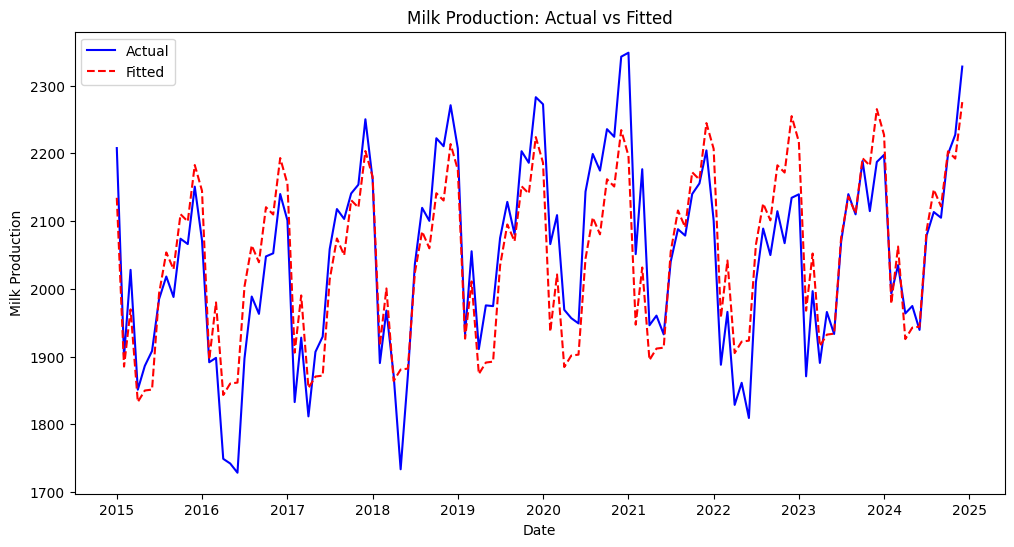

In [7]:
milk_production['fitted'] = model_milk_production.fittedvalues

# Plot actual vs fitted
plt.figure(figsize=(12, 6))
plt.plot(milk_production["date"], milk_production["milk_production"], label="Actual", color="blue")
plt.plot(milk_production["date"], milk_production["fitted"], label="Fitted", color="red", linestyle="--")

plt.title("Milk Production: Actual vs Fitted")
plt.xlabel("Date")
plt.ylabel("Milk Production")
plt.legend()
plt.show()

Alright, we can see that the Milk Production hasn't changed much throughout the years. There's a slight increasing trend and a clear yearly sazonality that is captured by a very simple Regression Model. 

We get an $R^2 = 0.78$, which seems good as well as the predictions plot on the training data.

## Visualizing Predictions on Test Data

In [11]:
test_df = create_future_dataframe()

In [9]:
test_df['milk_production'] = model_milk_production.predict(test_df) 

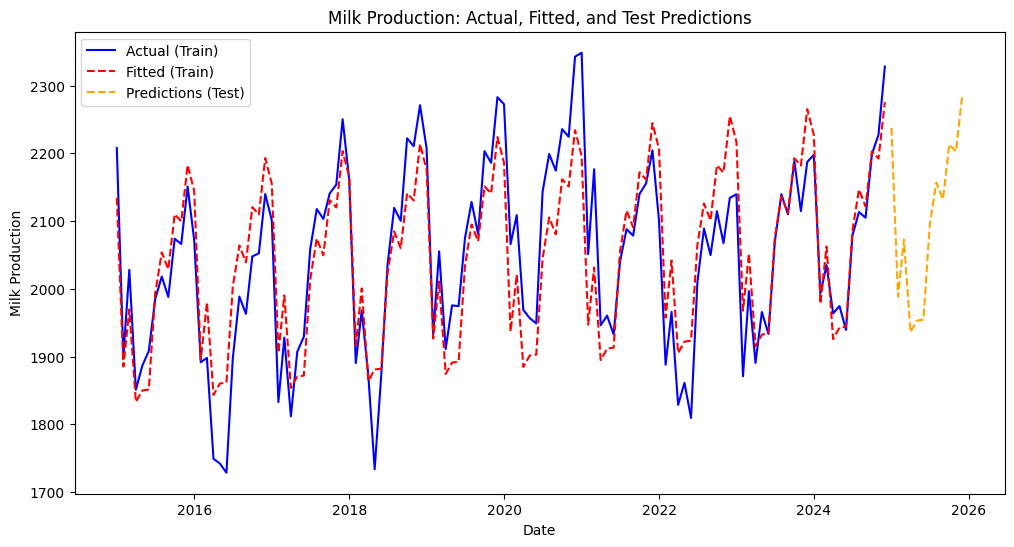

In [13]:
# Plot
plt.figure(figsize=(12, 6))

# Actual (train only)
plt.plot(milk_production["date"], milk_production["milk_production"],
         label="Actual (Train)", color="blue") 

# Fitted (train only)
plt.plot(milk_production["date"], milk_production["fitted"],
         label="Fitted (Train)", color="red", linestyle="--")

# Predictions (test only)
plt.plot(test_df["date"], test_df["milk_production"],
         label="Predictions (Test)", color="orange", linestyle="--")

plt.title("Milk Production: Actual, Fitted, and Test Predictions")
plt.xlabel("Date")
plt.ylabel("Milk Production")
plt.legend()
plt.show()

## Saving the Milk Predictions

In [16]:
test_df[['date', 'milk_production']].to_csv("../../predictions/2025_milk_production.csv", index=False)

## A Better Model?

SARIMA might be a model to try out as well.